# Ako sa oplati MHD v BA?

spocitajme si priblizne kolko stoji jazda 1km autom a elektrickou

In [98]:
auto = {
    'benzin_eur_l': 1.3,
    'spotreba_l_km': 6/100
    }
auto_rychlost_km_h = 32

elektricka_rychlost_km_h = 18
elektricka = [
    {'cena_eur': 0.7, 'cas_min': 15},
    {'cena_eur': 0.9, 'cas_min': 30},
    {'cena_eur': 1.2, 'cas_min': 60},
    {'cena_eur': 1.8, 'cas_min': 90},
    {'cena_eur': 2.3, 'cas_min': 120},
    {'cena_eur': 238, 'cas_min': 365*16*60}
]

def elektricka_eur_km(e):
    return e['cena_eur']/((e['cas_min']/60)*elektricka_rychlost_km_h)

ceny_eur_km = {}
for e in elektricka:
    ceny_eur_km[u'e' + str(e['cas_min'])] = elektricka_eur_km(e)

ceny_eur_km['auto'] =  auto['benzin_eur_l'] * auto['spotreba_l_km']

print(ceny_eur_km)

{'e30': 0.1, 'e90': 0.06666666666666667, 'e15': 0.15555555555555556, 'auto': 0.078, 'e350400': 0.0022640791476407915, 'e60': 0.06666666666666667, 'e120': 0.06388888888888888}


Takze vidime, ze jazda elektrickou je menej vyhodna ak sa jedna o o kratsie cesty, vizualizujme si teda cenu za 1km

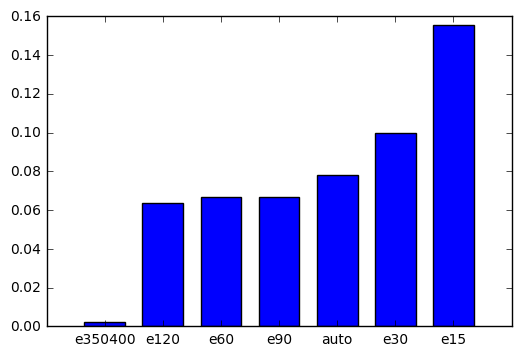

In [72]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy
d = numpy.array([(k, v) for k, v in ceny_eur_km.items()], dtype=[('name','U10'), ('price', float)])
d.sort(order='price')
x = numpy.arange(d.shape[0])
plt.bar(x, d['price'], align="center", width=0.7)
#plt.plot(x, d['price'])
plt.xticks(x, d['name'])
plt.show();

Kedy nastava zlom kedy sa viac oplati ist mhd? Ked cestujete viac ako 40 minut ak by sa vam pocitala cena z minut

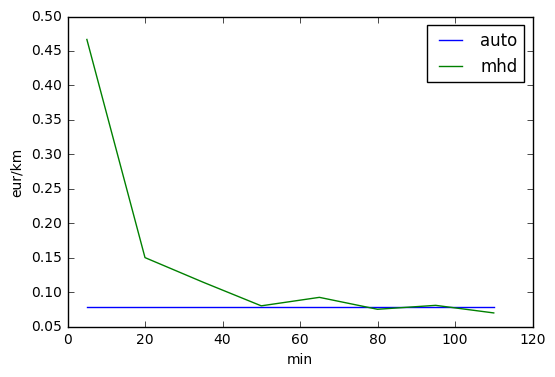

In [127]:
x = numpy.arange(5, 120, 15) #min
trend_auto_y = numpy.ones(8) * ceny_eur_km['auto']
trend_elektricka_y = [] #eur
for a in x:
    v = 99
    for e in elektricka:
        t = e['cena_eur'] / ((a/60) * elektricka_rychlost_km_h)
        if t < v and e['cas_min'] > a:
            v = t
    trend_elektricka_y.append(v)
    
plt.plot(x, trend_auto_y, label='auto');
plt.plot(x, trend_elektricka_y, label='mhd');
plt.xlabel('min')
plt.ylabel('eur/km')
plt.legend();

Realne vsak ceny pretnu okolo 20 minuty jazdy autom alebo elektrickou, avsak autom a elektrickou sa dostaneme rozdielne daleko, takze by sme to mohli nakreslit v kilometroch

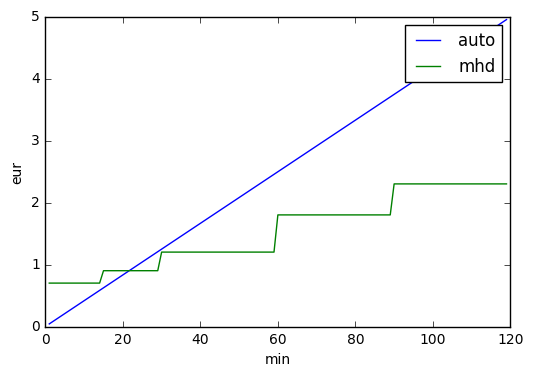

In [120]:
x = numpy.arange(1, 120, 1) #minuty uplynute
trend_auto_y = x * (ceny_eur_km['auto'] * (auto_rychlost_km_h/60)) # eur
trend_elektricka_y = [] #eur
for a in x:
    v = {'cena_eur': 99}
    for e in elektricka:
        if e['cena_eur'] < v['cena_eur'] and e['cas_min'] > a:
            v = e
    trend_elektricka_y.append(v['cena_eur'])
    
plt.plot(x, trend_auto_y, label='auto');
plt.plot(x, trend_elektricka_y, label='mhd');

plt.xlabel('min');
plt.ylabel('eur');

plt.legend();

Takze pri kilometroch vidime ze autom sa oplati ist do vzdialenosti 15km potom su auto a mhd porovnatelne drahe

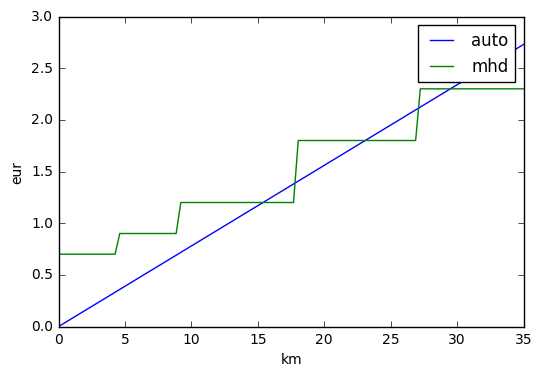

In [116]:
x = numpy.linspace(0.01, 35, 100) # km prejdene
trend_auto_y = (x * ceny_eur_km['auto'])  # eur
trend_elektricka_y = [] #eur
for a in x:
    v = {'cena_eur': 99}
    for e in elektricka:
        if e['cena_eur'] < v['cena_eur'] and elektricka_rychlost_km_h*(e['cas_min']/60) > a:
            v = e
    trend_elektricka_y.append(v['cena_eur'])
plt.plot(x, trend_auto_y, label='auto');
plt.plot(x, trend_elektricka_y, label='mhd');

plt.xlabel('km');
plt.ylabel('eur');

plt.legend();